In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [24]:
path = "high_diamond_ranked_10min.csv"
data = pd.read_csv(path)
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
conteo_clases = data['blueWins'].value_counts()  
print(conteo_clases)

0    4949
1    4930
Name: blueWins, dtype: int64


##### Podemos obserbar que el dataset está balanceado contamos solamente con una diferencia de 19 victorias entre las victorias azules y las victorias rojas

<function matplotlib.pyplot.show(close=None, block=None)>

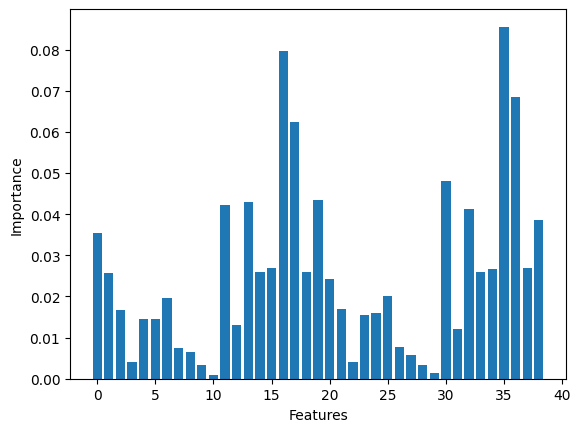

In [10]:
blueWins = data['blueWins']
df = data.drop('blueWins',axis=1)

model = RandomForestClassifier()
model.fit(df,blueWins)
# obtener las importancias 
importances = model.feature_importances_

plt.bar(range(df.shape[1]), importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, blueWins, train_size=0.8, random_state=1)

In [35]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(max_depth=5)
#entrenamiento
arbol_victorias = arbol.fit(X_train, Y_train)


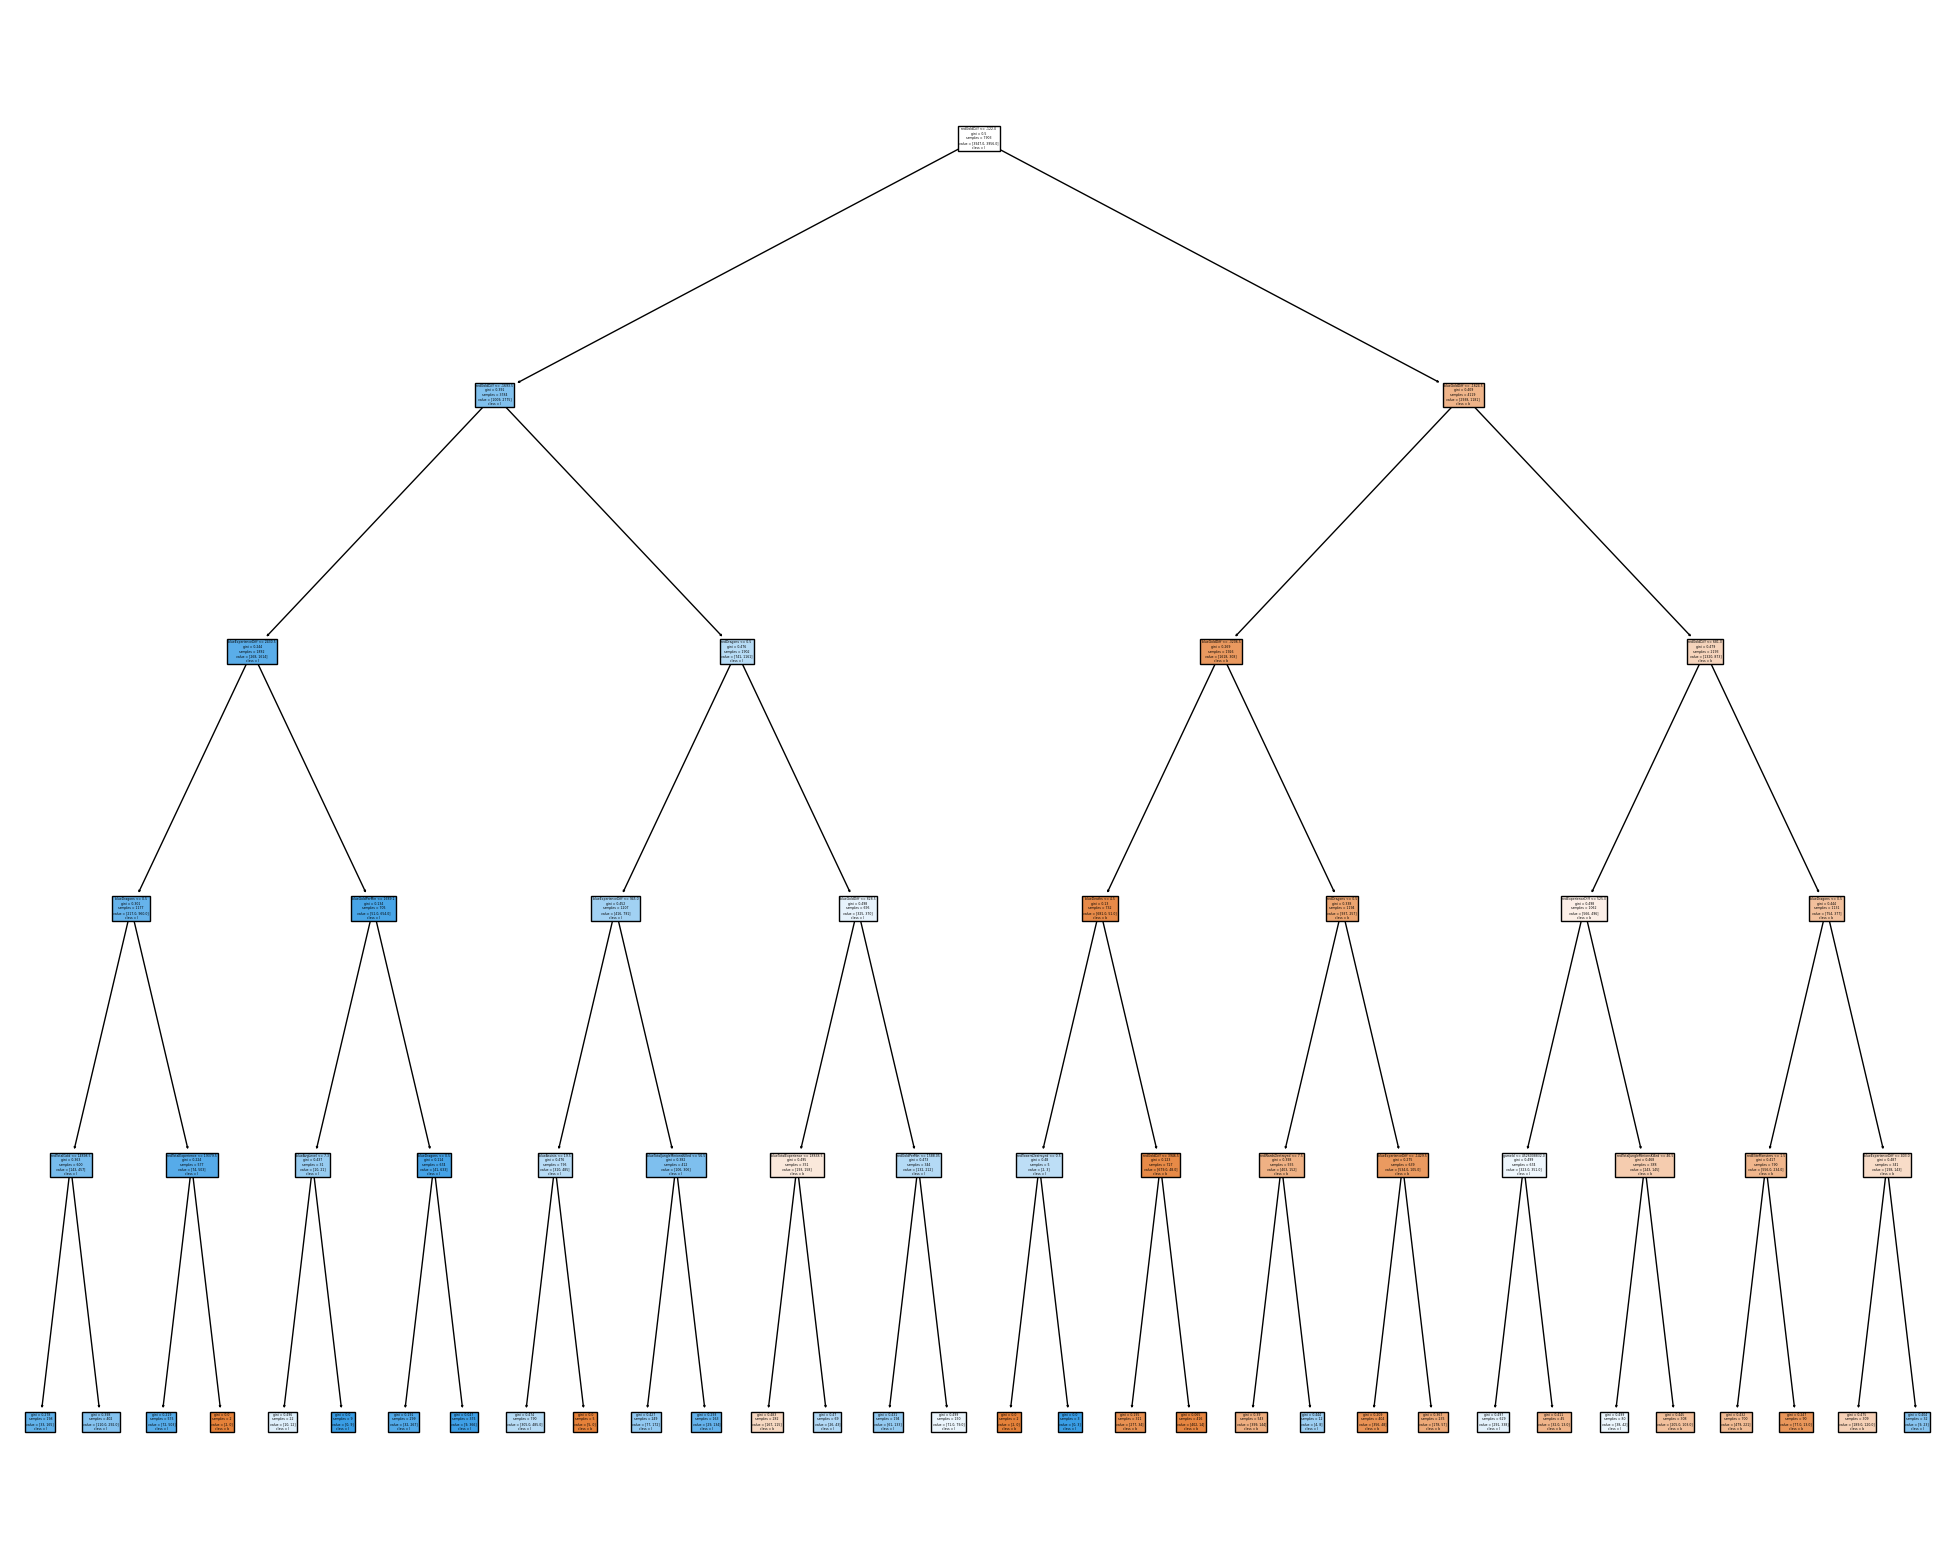

In [36]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(arbol_victorias, feature_names=list(df.columns.values), class_names=list("blueWins"), filled=True)
plt.show()
fig.savefig("ArbolConLibreria.png")

In [40]:
predic = arbol_victorias.predict(X_test)
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(Y_test, predic)
print(matriz)
# no
# si 

[[675 327]
 [222 752]]
